# Data Collection
## 1. Nasdaq IXIC Index data

In [7]:
import yfinance as yf

In [8]:
msft = yf.Ticker("^IXIC")

In [9]:
# dataframe of Nasdaq IXIC price change for 1 year
ixic_yr = msft.history(period="1y")
ixic_yr

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-11,13273.309570,13433.620117,13246.330078,13398.669922,5956260000,0,0
2021-03-12,13222.809570,13324.690430,13158.719727,13319.860352,5472340000,0,0
2021-03-15,13323.469727,13460.349609,13272.500000,13459.709961,5933440000,0,0
2021-03-16,13523.169922,13620.709961,13397.080078,13471.570312,5463770000,0,0
2021-03-17,13336.910156,13595.000000,13272.690430,13525.200195,5465500000,0,0
...,...,...,...,...,...,...,...
2022-03-07,13328.360352,13353.280273,12828.019531,12830.959961,6163580000,0,0
2022-03-08,12800.040039,13159.440430,12670.080078,12795.549805,6631820000,0,0
2022-03-09,13113.700195,13301.160156,13039.790039,13255.549805,5377120000,0,0


In [10]:
# dataframe of Nasdaq IXIC price change last 5 days, 1 min. interval
ixic = msft.history(period="5d", interval="1m")
ixic

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2022-03-07 09:30:00-05:00,13329.956055,13332.303711,13324.276367,13332.303711,0,0,0
2022-03-07 09:31:00-05:00,13339.118164,13349.184570,13338.554688,13349.184570,22908592,0,0
2022-03-07 09:32:00-05:00,13351.328125,13351.328125,13328.917969,13328.917969,36035802,0,0
2022-03-07 09:33:00-05:00,13330.802734,13337.328125,13315.862305,13315.862305,35061622,0,0
2022-03-07 09:34:00-05:00,13316.958008,13316.958008,13302.474609,13302.474609,30773895,0,0
...,...,...,...,...,...,...,...
2022-03-11 15:46:00-05:00,12886.430664,12887.310547,12881.228516,12882.554688,15098000,0,0
2022-03-11 15:47:00-05:00,12882.062500,12883.877930,12881.685547,12883.877930,14108000,0,0
2022-03-11 15:48:00-05:00,12883.383789,12886.766602,12877.633789,12880.830078,25327000,0,0


# 2. Bitcoin data from Binance

In [2]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

In [12]:
# required info. for accessing binance API
apikey = 'your binance api key'
secret = 'your binance secret code'

In [13]:
# api permission 
client = Client(apikey, secret)

In [14]:
# dataframe of Nasdaq IXIC price change for 1 year
historical = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, '11 MAR 2021')
df_yr = pd.DataFrame(historical, columns = ["Open time", "Open", "High", "Low", "Close", "Volume", "Close time", "Quote asset volume", 
"Number of trades", "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"])

'''
Column names in Binance API documentation: 

list of OHLCV values (Open time, Open, High, Low, Close, Volume, Close time, Quote asset volume, 
Number of trades, Taker buy base asset volume, Taker buy quote asset volume, Ignore)

'''

df_yr

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1615420800000,55851.59000000,58150.00000000,54272.82000000,57773.16000000,81914.81285900,1615507199999,4612366201.00222005,2509970,40603.44966800,2288704819.09510673,0
1,1615507200000,57773.15000000,58081.51000000,54962.84000000,57221.72000000,73405.40604700,1615593599999,4162054726.37883880,2489931,35802.94146200,2030616300.47343136,0
2,1615593600000,57221.72000000,61844.00000000,56078.23000000,61188.39000000,83245.09134600,1615679999999,4933383453.24597802,2559002,44387.23191800,2631390814.77279265,0
3,1615680000000,61188.38000000,61724.79000000,58966.78000000,58968.31000000,52601.05275000,1615766399999,3176397573.88464251,1829769,25325.26705000,1530051005.39804023,0
4,1615766400000,58976.08000000,60633.43000000,54600.00000000,55605.20000000,102771.42729800,1615852799999,5874241052.09337221,2683815,49825.43834700,2848907086.63436949,0
...,...,...,...,...,...,...,...,...,...,...,...,...
361,1646611200000,38420.80000000,39547.57000000,37155.00000000,37988.00000000,63941.20316000,1646697599999,2447310342.46661930,1454770,31624.08426000,1210428347.72461300,0
362,1646697600000,37988.01000000,39362.08000000,37867.65000000,38730.63000000,55528.43367000,1646783999999,2147541837.68824710,1269742,27931.99999000,1080277222.53459880,0
363,1646784000000,38730.63000000,42594.06000000,38656.45000000,41941.71000000,67392.58799000,1646870399999,2797240840.96074690,1570230,34598.34753000,1435303843.98738530,0
364,1646870400000,41941.70000000,42039.63000000,38539.73000000,39422.00000000,71950.25677000,1646956799999,2853792081.10770610,1512384,33795.03278000,1339863548.33540330,0


In [15]:
# dataframe of Bitcoin price change last 5 days, 1 min. interval
historical = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1MINUTE, '7 MAR 2022')
bitcoin = pd.DataFrame(historical, columns = ["Open time", "Open", "High", "Low", "Close", "Volume", "Close time", "Quote asset volume", 
"Number of trades", "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"])
bitcoin

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1646611200000,38420.80000000,38466.11000000,38377.50000000,38448.10000000,74.44408000,1646611259999,2859960.83760590,1400,37.26088000,1431486.80353850,0
1,1646611260000,38448.10000000,38464.57000000,38430.05000000,38464.56000000,32.07250000,1646611319999,1233210.16632490,746,20.74952000,797851.45442540,0
2,1646611320000,38464.56000000,38468.67000000,38414.84000000,38442.67000000,38.56586000,1646611379999,1482579.52660460,1019,12.56360000,482831.15863270,0
3,1646611380000,38442.67000000,38446.29000000,38299.14000000,38329.04000000,123.89688000,1646611439999,4750590.15144510,1837,58.80651000,2253896.99869780,0
4,1646611440000,38329.04000000,38340.35000000,38286.62000000,38331.77000000,75.74093000,1646611499999,2901835.54597130,1318,42.56648000,1630622.03277960,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7006,1647031560000,38423.62000000,38507.00000000,38400.00000000,38493.22000000,153.74941000,1647031619999,5911219.26838130,3002,76.71553000,2949546.12885700,0
7007,1647031620000,38493.23000000,38521.78000000,38453.01000000,38459.00000000,38.10447000,1647031679999,1466734.32417240,1200,18.27466000,703406.68844000,0
7008,1647031680000,38459.00000000,38463.13000000,38372.08000000,38443.19000000,93.77193000,1647031739999,3602305.04591960,2112,36.24202000,1392183.93713700,0
7009,1647031740000,38443.20000000,38450.45000000,38347.98000000,38364.53000000,76.85429000,1647031799999,2949942.41642780,1628,26.92991000,1033488.08088280,0


## 3. Save dataframes as csv files, backup

In [3]:
ixic_yr.to_csv("ixic_year.csv")
ixic.to_csv("ixic_5days.csv")
df_yr.to_csv("bitcoin_year.csv")
bitcoin.to_csv("bitcoin_5days.csv")

NameError: name 'ixic_yr' is not defined

# Data Cleaning and Preprocessing

In [130]:
# for later use, skipping data the collection part above
import pandas as pd

In [3]:
# read csvs
ixic_yr = pd.read_csv("ixic_year.csv")
ixic = pd.read_csv("ixic_5days.csv")
bitcoin_yr = pd.read_csv("bitcoin_year.csv")
bitcoin = pd.read_csv("bitcoin_5days.csv")

### 1. Converting epoch time to datetime in Binance Bitcoin df

In [4]:
bitcoin_yr["Open time"] = bitcoin_yr["Open time"] / 1000
bitcoin_yr["datetime"] = pd.to_datetime(bitcoin_yr["Open time"], unit='s')
bitcoin_yr["datetime"]

0     2021-03-11
1     2021-03-12
2     2021-03-13
3     2021-03-14
4     2021-03-15
         ...    
361   2022-03-07
362   2022-03-08
363   2022-03-09
364   2022-03-10
365   2022-03-11
Name: datetime, Length: 366, dtype: datetime64[ns]

In [5]:
bitcoin['Open time'] = bitcoin['Open time'] / 1000
bitcoin['datetime'] = pd.to_datetime(bitcoin['Open time'], unit='s')
bitcoin['datetime']

0      2022-03-07 00:00:00
1      2022-03-07 00:01:00
2      2022-03-07 00:02:00
3      2022-03-07 00:03:00
4      2022-03-07 00:04:00
               ...        
7006   2022-03-11 20:46:00
7007   2022-03-11 20:47:00
7008   2022-03-11 20:48:00
7009   2022-03-11 20:49:00
7010   2022-03-11 20:50:00
Name: datetime, Length: 7011, dtype: datetime64[ns]

### 2. Change the datetime timezone of Nasdaq IXIC to UTC from U.S. NY timezone

Since NY timezone, -5:00 from UTC, does not affect 'date' in daily price change dataset(ixic_yr), the conversion is not needed. I will convert only the 'datetime' of Nasdaq IXIC one-minute-interval price change dataset to UTC datetime. 

In [6]:
ixic.head(5)

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-03-07 09:30:00-05:00,13329.956055,13332.303711,13324.276367,13332.303711,0,0,0
1,2022-03-07 09:31:00-05:00,13339.118164,13349.184570,13338.554688,13349.184570,22908592,0,0
2,2022-03-07 09:32:00-05:00,13351.328125,13351.328125,13328.917969,13328.917969,36035802,0,0
3,2022-03-07 09:33:00-05:00,13330.802734,13337.328125,13315.862305,13315.862305,35061622,0,0
4,2022-03-07 09:34:00-05:00,13316.958008,13316.958008,13302.474609,13302.474609,30773895,0,0


In [7]:
# checking dtype of the datetime column
ixic['Datetime'].dtype

dtype('O')

In [8]:
# convert object to pd datetime in UTC timezone, then remove timezone info.
ixic['Datetime'] = pd.to_datetime(ixic['Datetime'], utc=True).dt.tz_localize(None)
ixic.head(5)

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-03-07 14:30:00,13329.956055,13332.303711,13324.276367,13332.303711,0,0,0
1,2022-03-07 14:31:00,13339.118164,13349.184570,13338.554688,13349.184570,22908592,0,0
2,2022-03-07 14:32:00,13351.328125,13351.328125,13328.917969,13328.917969,36035802,0,0
3,2022-03-07 14:33:00,13330.802734,13337.328125,13315.862305,13315.862305,35061622,0,0
4,2022-03-07 14:34:00,13316.958008,13316.958008,13302.474609,13302.474609,30773895,0,0


### 3. Creating percentage change column

In [9]:
# dict of name and df variables for saving time and space
df_vars = {"ixic_year" : ixic_yr, "ixic" : ixic, "bitcoin_year" : bitcoin_yr, "bitcoin" : bitcoin}

In [10]:
# create pct_change in each df, then remove null rows generated while being shifted
for k, df_var in df_vars.items():
    df_var['pct_change'] = df_var['Close'].pct_change()
    df_var = df_var.dropna(inplace=True)

### 4. Data type, missing value, duplicates check

In [11]:
# dict of name and df variables for saving time and space
df_vars = {"ixic_year" : ixic_yr, "ixic" : ixic, "bitcoin_year" : bitcoin_yr, "bitcoin" : bitcoin}

for k, df_var in df_vars.items():
    print(k + "\n")
    display(df_var.info())

ixic_year

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 1 to 253
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          253 non-null    object 
 1   Open          253 non-null    float64
 2   High          253 non-null    float64
 3   Low           253 non-null    float64
 4   Close         253 non-null    float64
 5   Volume        253 non-null    int64  
 6   Dividends     253 non-null    int64  
 7   Stock Splits  253 non-null    int64  
 8   pct_change    253 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 19.8+ KB


None

ixic

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1940 entries, 1 to 1940
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Datetime      1940 non-null   datetime64[ns]
 1   Open          1940 non-null   float64       
 2   High          1940 non-null   float64       
 3   Low           1940 non-null   float64       
 4   Close         1940 non-null   float64       
 5   Volume        1940 non-null   int64         
 6   Dividends     1940 non-null   int64         
 7   Stock Splits  1940 non-null   int64         
 8   pct_change    1940 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 151.6 KB


None

bitcoin_year

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    365 non-null    int64         
 1   Open time                     365 non-null    float64       
 2   Open                          365 non-null    float64       
 3   High                          365 non-null    float64       
 4   Low                           365 non-null    float64       
 5   Close                         365 non-null    float64       
 6   Volume                        365 non-null    float64       
 7   Close time                    365 non-null    int64         
 8   Quote asset volume            365 non-null    float64       
 9   Number of trades              365 non-null    int64         
 10  Taker buy base asset volume   365 non-null    float64       
 11  Taker buy quote as

None

bitcoin

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7010 entries, 1 to 7010
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    7010 non-null   int64         
 1   Open time                     7010 non-null   float64       
 2   Open                          7010 non-null   float64       
 3   High                          7010 non-null   float64       
 4   Low                           7010 non-null   float64       
 5   Close                         7010 non-null   float64       
 6   Volume                        7010 non-null   float64       
 7   Close time                    7010 non-null   int64         
 8   Quote asset volume            7010 non-null   float64       
 9   Number of trades              7010 non-null   int64         
 10  Taker buy base asset volume   7010 non-null   float64       
 11  Taker buy quote asset

None

##### Changing data type of "Date" column to datetime

In [12]:
ixic_yr['Date'] = pd.to_datetime(ixic_yr['Date'])
ixic_yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 1 to 253
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          253 non-null    datetime64[ns]
 1   Open          253 non-null    float64       
 2   High          253 non-null    float64       
 3   Low           253 non-null    float64       
 4   Close         253 non-null    float64       
 5   Volume        253 non-null    int64         
 6   Dividends     253 non-null    int64         
 7   Stock Splits  253 non-null    int64         
 8   pct_change    253 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 19.8 KB


##### Checking missing values

In [13]:
for k, df_var in df_vars.items():
    print(k + "\n")
    display(df_var.isna().sum())

ixic_year



Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
pct_change      0
dtype: int64

ixic



Datetime        0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
pct_change      0
dtype: int64

bitcoin_year



Unnamed: 0                      0
Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
datetime                        0
pct_change                      0
dtype: int64

bitcoin



Unnamed: 0                      0
Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
datetime                        0
pct_change                      0
dtype: int64

##### Duplicates check

In [14]:
for k, df_var in df_vars.items():
    print(k, '| number of duplicates: ', df_var.duplicated(subset=None, keep='first').sum())

ixic_year | number of duplicates:  0
ixic | number of duplicates:  0
bitcoin_year | number of duplicates:  0
bitcoin | number of duplicates:  0


### 5. Removing columns that are not needed

In [15]:
ixic_yr = ixic_yr.drop(ixic_yr[['Dividends', 'Stock Splits']], axis=1)
ixic = ixic.drop(ixic[['Dividends', 'Stock Splits']], axis=1)
bitcoin_yr = bitcoin_yr.drop(bitcoin_yr[['Unnamed: 0', 'Open time', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']], axis=1)
bitcoin = bitcoin.drop(bitcoin[['Unnamed: 0', 'Open time', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']], axis=1)

In [16]:
display(ixic_yr)
display(ixic)
display(bitcoin_yr)
display(bitcoin)

,Date,Open,High,Low,Close,Volume,pct_change
1,2021-03-12,13222.809570,13324.690430,13158.719727,13319.860352,5472340000,-0.005882
2,2021-03-15,13323.469727,13460.349609,13272.500000,13459.709961,5933440000,0.010499
3,2021-03-16,13523.169922,13620.709961,13397.080078,13471.570312,5463770000,0.000881
4,2021-03-17,13336.910156,13595.000000,13272.690430,13525.200195,5465500000,0.003981
5,2021-03-18,13349.200195,13384.459961,13101.919922,13116.169922,5699900000,-0.030242
...,...,...,...,...,...,...,...
249,2022-03-07,13328.360352,13353.280273,12828.019531,12830.959961,6163580000,-0.036240
250,2022-03-08,12800.040039,13159.440430,12670.080078,12795.549805,6631820000,-0.002760
251,2022-03-09,13113.700195,13301.160156,13039.790039,13255.549805,5377120000,0.035950
252,2022-03-10,13098.349609,13163.500000,12946.280273,13129.959961,5034030000,-0.009475


,Datetime,Open,High,Low,Close,Volume,pct_change
1,2022-03-07 14:31:00,13339.118164,13349.184570,13338.554688,13349.184570,22908592,0.001266
2,2022-03-07 14:32:00,13351.328125,13351.328125,13328.917969,13328.917969,36035802,-0.001518
3,2022-03-07 14:33:00,13330.802734,13337.328125,13315.862305,13315.862305,35061622,-0.000979
4,2022-03-07 14:34:00,13316.958008,13316.958008,13302.474609,13302.474609,30773895,-0.001005
5,2022-03-07 14:35:00,13296.497070,13301.128906,13294.953125,13299.210938,23273797,-0.000245
...,...,...,...,...,...,...,...
1936,2022-03-11 20:46:00,12886.430664,12887.310547,12881.228516,12882.554688,15098000,-0.000336
1937,2022-03-11 20:47:00,12882.062500,12883.877930,12881.685547,12883.877930,14108000,0.000103
1938,2022-03-11 20:48:00,12883.383789,12886.766602,12877.633789,12880.830078,25327000,-0.000237
1939,2022-03-11 20:49:00,12884.817383,12885.871094,12879.644531,12880.467773,8773000,-0.000028


,Open,High,Low,Close,Volume,datetime,pct_change
1,57773.15,58081.51,54962.84,57221.72,73405.406047,2021-03-12,-0.009545
2,57221.72,61844.00,56078.23,61188.39,83245.091346,2021-03-13,0.069321
3,61188.38,61724.79,58966.78,58968.31,52601.052750,2021-03-14,-0.036283
4,58976.08,60633.43,54600.00,55605.20,102771.427298,2021-03-15,-0.057032
5,55605.20,56938.29,53271.34,56900.75,77986.694355,2021-03-16,0.023299
...,...,...,...,...,...,...,...
361,38420.80,39547.57,37155.00,37988.00,63941.203160,2022-03-07,-0.011265
362,37988.01,39362.08,37867.65,38730.63,55528.433670,2022-03-08,0.019549
363,38730.63,42594.06,38656.45,41941.71,67392.587990,2022-03-09,0.082908
364,41941.70,42039.63,38539.73,39422.00,71950.256770,2022-03-10,-0.060076


,Open,High,Low,Close,Volume,datetime,pct_change
1,38448.10,38464.57,38430.05,38464.56,32.07250,2022-03-07 00:01:00,0.000428
2,38464.56,38468.67,38414.84,38442.67,38.56586,2022-03-07 00:02:00,-0.000569
3,38442.67,38446.29,38299.14,38329.04,123.89688,2022-03-07 00:03:00,-0.002956
4,38329.04,38340.35,38286.62,38331.77,75.74093,2022-03-07 00:04:00,0.000071
5,38331.76,38390.33,38331.76,38367.02,32.22486,2022-03-07 00:05:00,0.000920
...,...,...,...,...,...,...,...
7006,38423.62,38507.00,38400.00,38493.22,153.74941,2022-03-11 20:46:00,0.001645
7007,38493.23,38521.78,38453.01,38459.00,38.10447,2022-03-11 20:47:00,-0.000889
7008,38459.00,38463.13,38372.08,38443.19,93.77193,2022-03-11 20:48:00,-0.000411
7009,38443.20,38450.45,38347.98,38364.53,76.85429,2022-03-11 20:49:00,-0.002046


# Analyzing

In [128]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import MinMaxScaler
import warnings
# warning off
warnings.filterwarnings('ignore')

## 1. Descriptive Statistics 
#### Daily price

In [18]:
ixic_yr.describe()

,Open,High,Low,Close,Volume,pct_change
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,14495.018894,14590.436875,14380.847598,14490.473393,4.683066e+09,-0.000079
std,820.898715,803.276318,828.785254,817.143907,7.640727e+08,0.012498
min,12587.879883,13021.860352,12587.879883,12795.549805,3.379850e+09,-0.037366
25%,13812.190430,13905.410156,13706.860352,13791.150391,4.142540e+09,-0.006386
50%,14571.530273,14642.030273,14471.879883,14528.330078,4.517770e+09,0.000674
75%,15140.429688,15205.500000,15011.580078,15121.679688,5.095960e+09,0.007905
max,16120.919922,16212.230469,16017.230469,16057.440430,7.616320e+09,0.035950


In [19]:
bitcoin_yr.describe()

,Open,High,Low,Close,Volume,pct_change
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,47234.864603,48522.115397,45685.303562,47182.052849,60043.722222,-0.000349
std,9335.755799,9429.887618,9239.724171,9330.944445,34410.435030,0.039261
min,29790.340000,31063.070000,28805.000000,29790.350000,17732.081130,-0.143751
25%,39219.160000,40480.010000,37867.650000,39148.660000,39498.870000,-0.022697
50%,46762.990000,47954.630000,45500.000000,46760.620000,51724.320470,-0.000342
75%,55996.910000,57680.000000,53813.160000,55953.450000,70459.621490,0.021167
max,67525.820000,69000.000000,66222.400000,67525.830000,354347.243161,0.144856


1. Comparing the percentage change mean and standard deviation of Nasdaq IXIC to those of Bitcoin, Bitcoin seems to have had more volatility for the last one year price change.

2. The number of rows is different from one another because Bitcoin market is open 24 hours, 7 days a week while Nasdaq is not.

## 2. Exploratory Data Analysis
#### Daily close price of Nasdaq IXIC and Bitcoin for the past one year

<AxesSubplot:xlabel='datetime'>

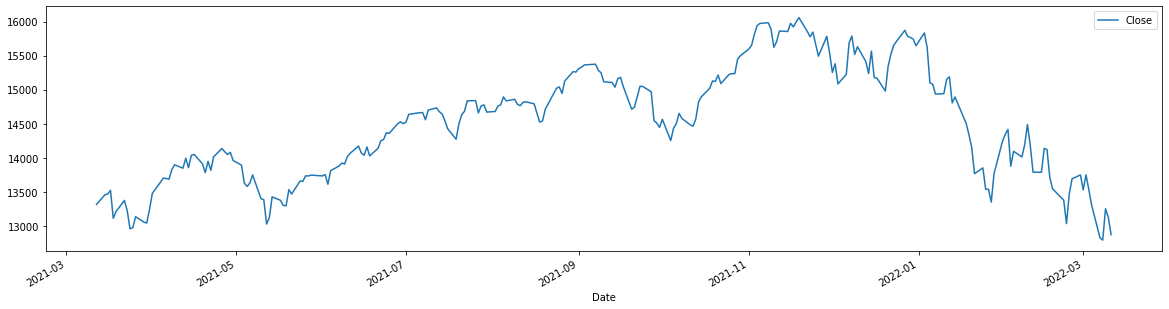

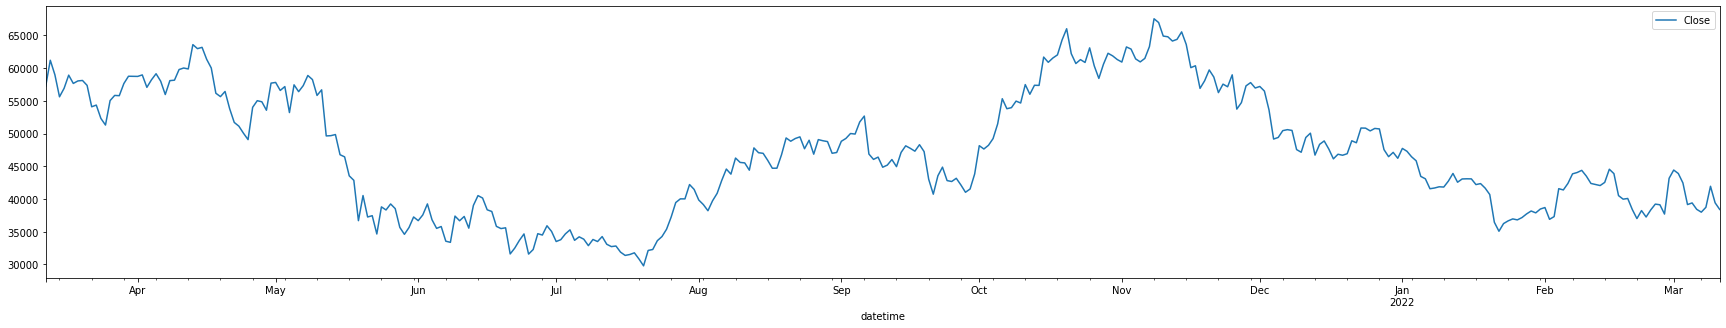

In [126]:
ixic_yr.plot(x='Date', y='Close', figsize=(20,5))
bitcoin_yr.plot(x='datetime', y='Close', figsize=(30,5))

####  More processing required
Bitcoin dataset has more date rows than Nasdaq one because the latter opens only 5 days a week. Also, the price scale is very different. For an accurate price change comparison, date rows in the two datasets should be processed to have the same dates, and the close prices must be normalized.

#### Normalizing close price (MinMax Scaling)

In [21]:
mms = MinMaxScaler()

ixic_yr['nm_close'] = mms.fit_transform(ixic_yr[['Close']])
ixic['nm_close'] = mms.fit_transform(ixic[['Close']])
bitcoin_yr['nm_close'] = mms.fit_transform(bitcoin_yr[['Close']])
bitcoin['nm_close'] = mms.fit_transform(bitcoin[['Close']])

#### Subsetting identical date rows from bitcoin dfs 

In [22]:
bitcoin_yr1 = bitcoin_yr.loc[bitcoin_yr['datetime'].isin(ixic_yr['Date'])]
bitcoin1 = bitcoin.loc[bitcoin['datetime'].isin(ixic['Datetime'])]

#### Plotting normalized daily close price of the two dfs  

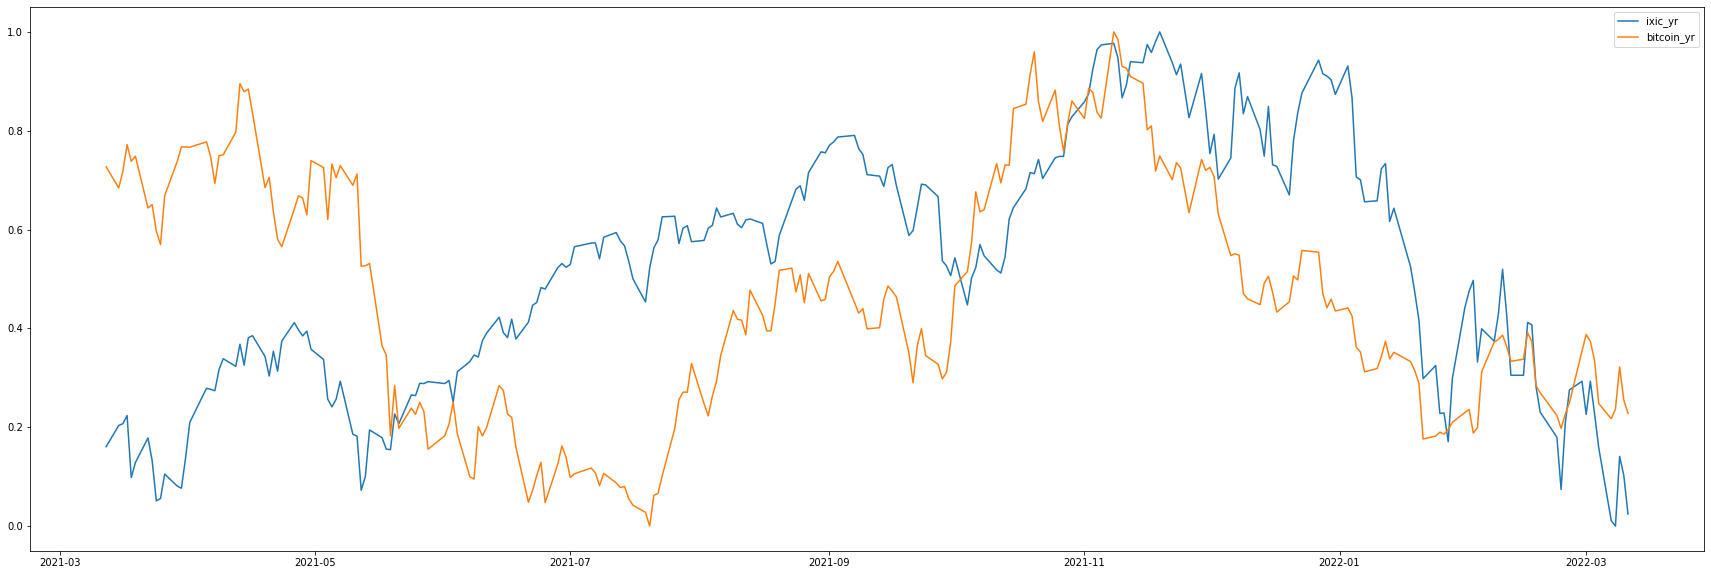

In [23]:
plt.figure(figsize=(30,10))
plt.plot('Date', 'nm_close', data=ixic_yr)
plt.plot('datetime', 'nm_close', data=bitcoin_yr1)
plt.legend(labels=('ixic_yr', 'bitcoin_yr'))

### One-minute-interval price change
#### Plotting normalized close price of the two dfs in an one minute interval 

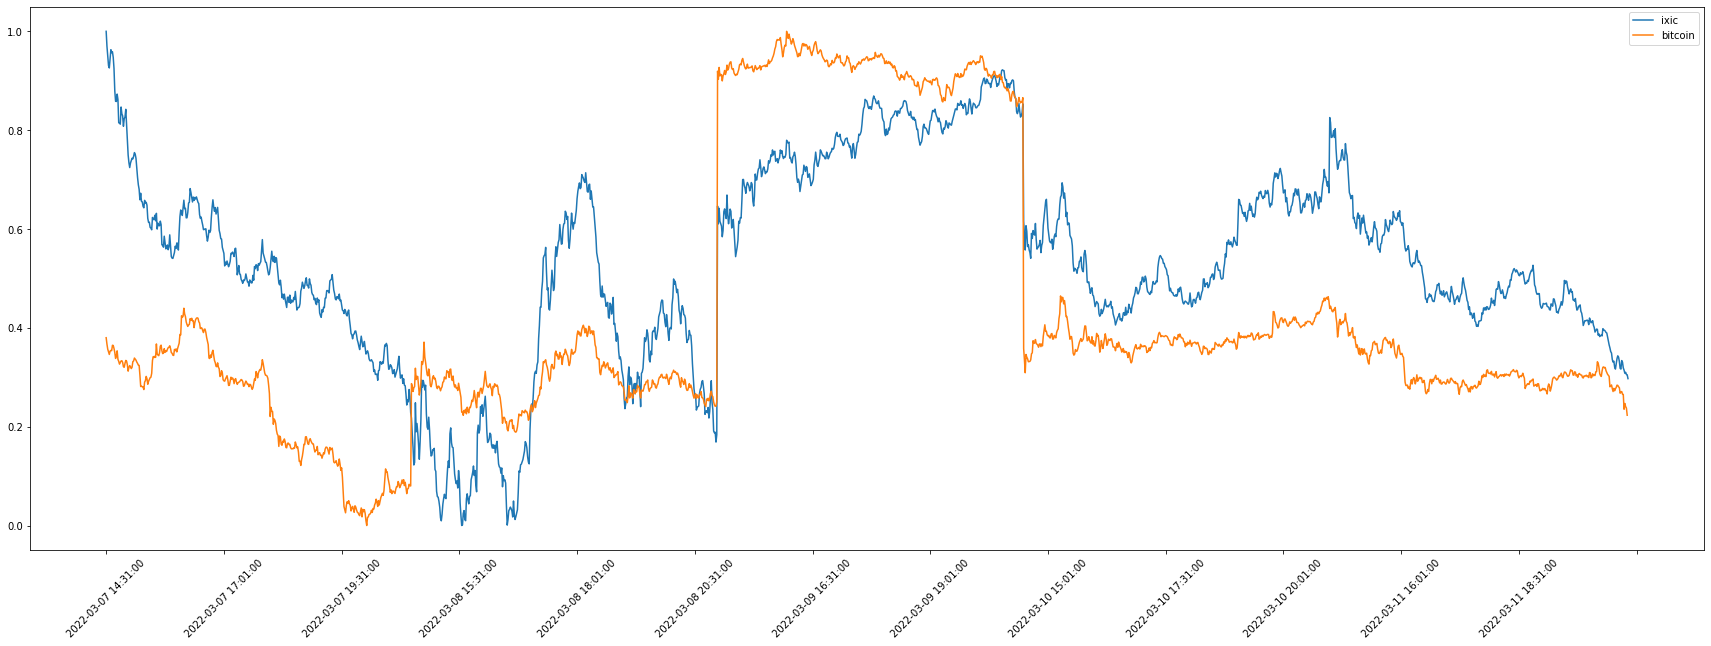

In [24]:
# remove dates not in the datasets on x-axis
ixic['Datetime_str'] = ixic['Datetime'].astype('str')
bitcoin1['datetime_str'] = bitcoin1['datetime'].astype('str')

f, ax = plt.subplots(figsize=(30,10))
ax.plot('Datetime_str', 'nm_close', data=ixic)
ax.plot('datetime_str', 'nm_close', data=bitcoin1)
ax.legend(labels=('ixic', 'bitcoin'))
# limit the number of max xticks shown on the plot
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation = 45)
plt.show()

1. Although there is a large degree of volatility difference between Nasdaq IXIC index and Bitcoin price change, the past 5 day one-minute-interval price movement seems to show that the two's are coupled.

2. Comparing to one-minute-interval change, daily price change is not very identical.

3. There are months when the two's daily price movement was more similar. For instance, the price movement in March, 2022 seems more identical than that in other periods.

### Closer Look : monthly, daily and hourly change comparison
#### Creating new period columns by month, day and hour for later subsetting and calculation

In [25]:
# add month and day period columns on daily dfs
ixic_yr['month'] = ixic_yr['Date'].dt.to_period(freq='M')
bitcoin_yr1['month'] = bitcoin_yr1['datetime'].dt.to_period(freq='M')

# add month, day, hour period columns on 1-minute-interval dfs
ixic['day'] = ixic['Datetime'].dt.to_period(freq='D')
ixic['hour'] = ixic['Datetime'].dt.to_period(freq='H')
bitcoin1['day'] = bitcoin1['datetime'].dt.to_period(freq='D')
bitcoin1['hour'] = bitcoin1['datetime'].dt.to_period(freq='H')

#### Daily price month by month

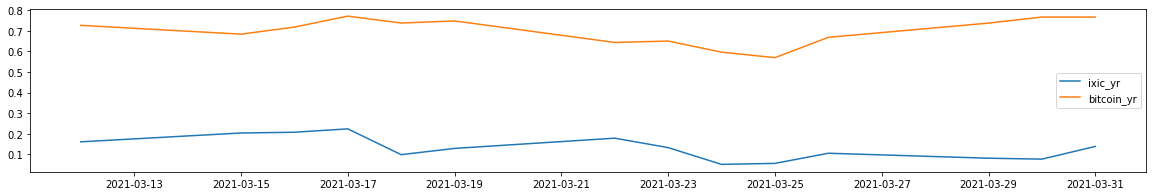

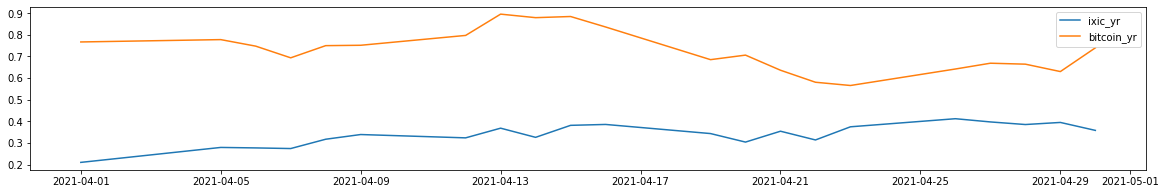

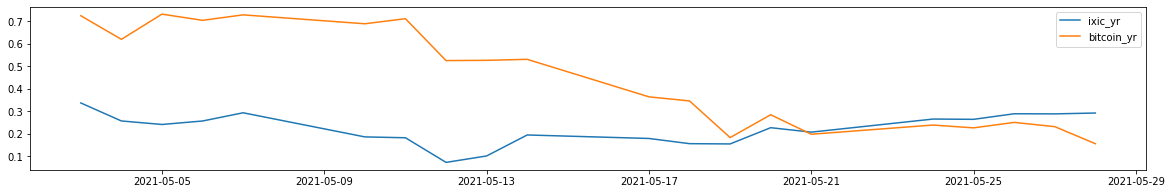

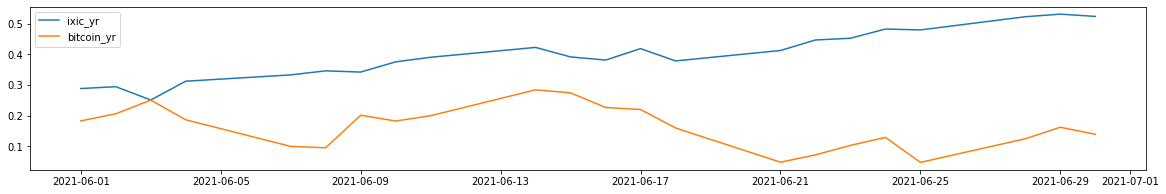

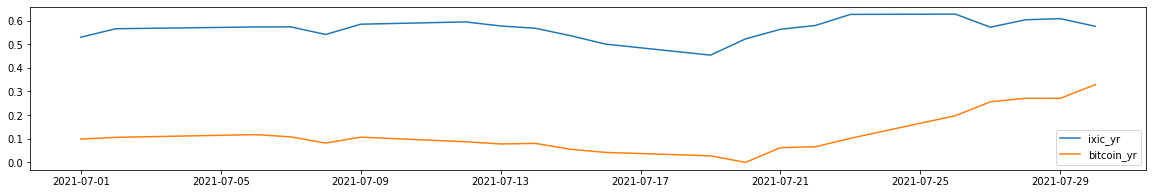

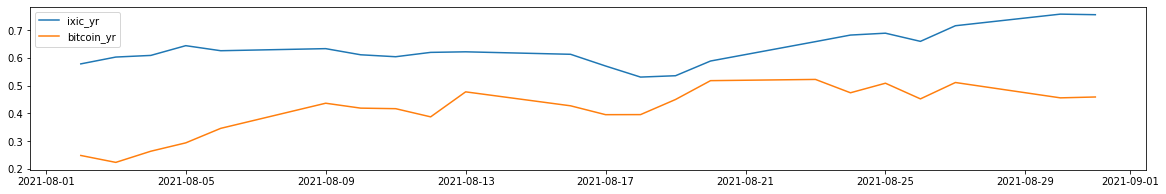

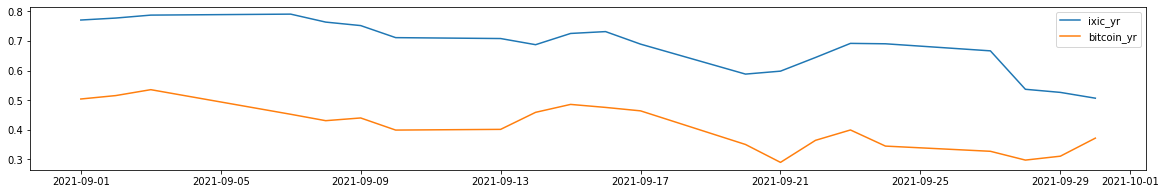

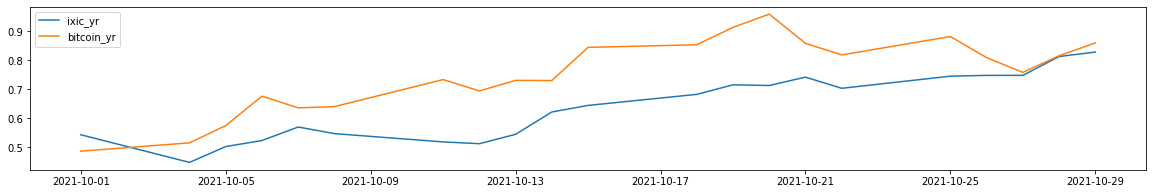

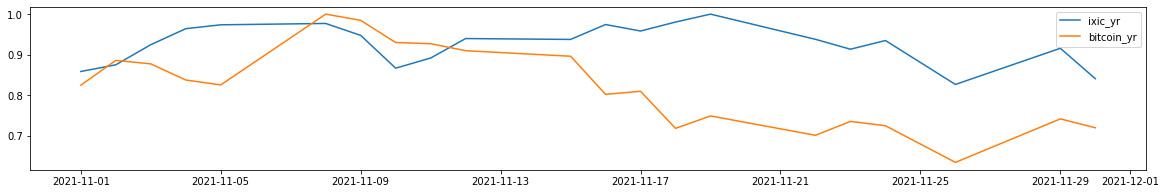

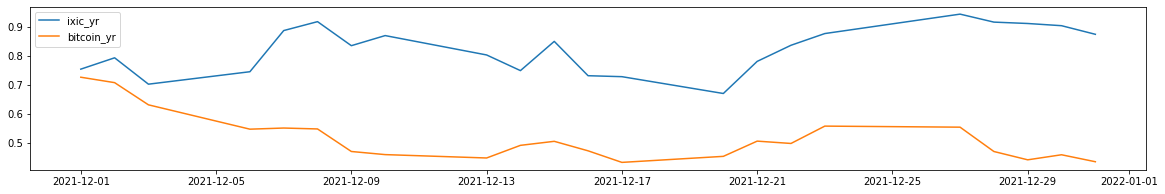

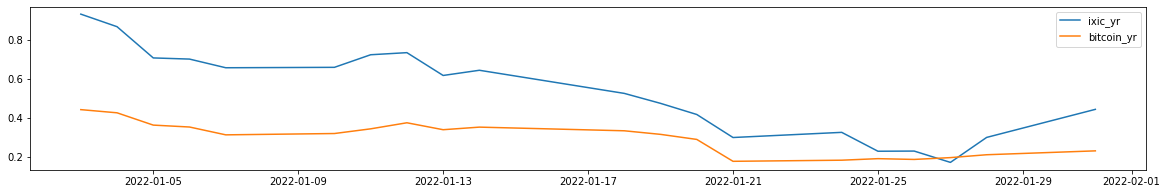

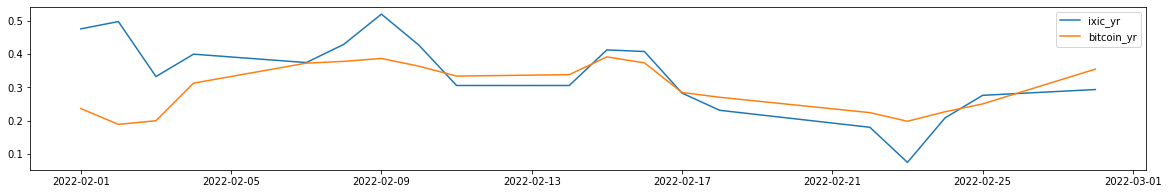

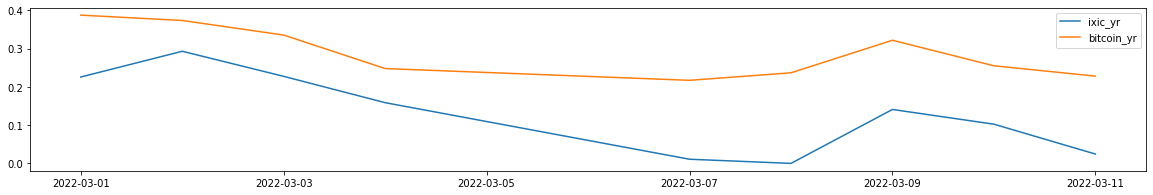

In [26]:
for date in ixic_yr['month'].unique():
    temp_ixic = ixic_yr.loc[ixic_yr['month'] == date]
    temp_btc = bitcoin_yr1.loc[bitcoin_yr1['month'] == date]
    plt.figure(figsize=(20,3))
    plt.plot('Date', 'nm_close', data=temp_ixic)
    plt.plot('datetime', 'nm_close', data=temp_btc)
    plt.legend(labels=('ixic_yr', 'bitcoin_yr'))
    plt.show()

#### One-minute-interval price, day by day, 2022-03-07 ~ 2022-03-11

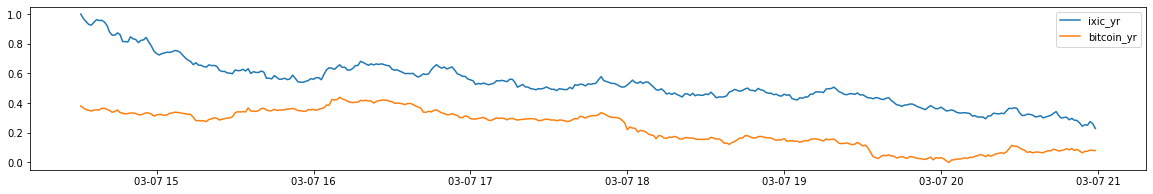

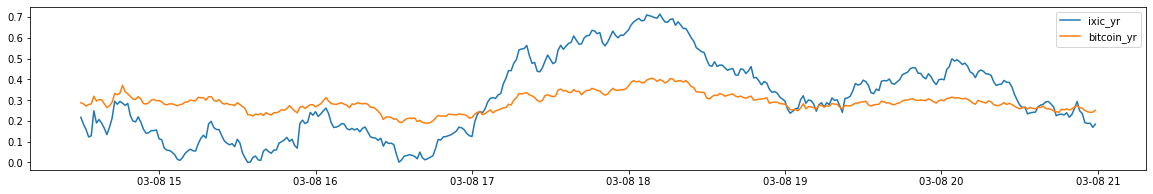

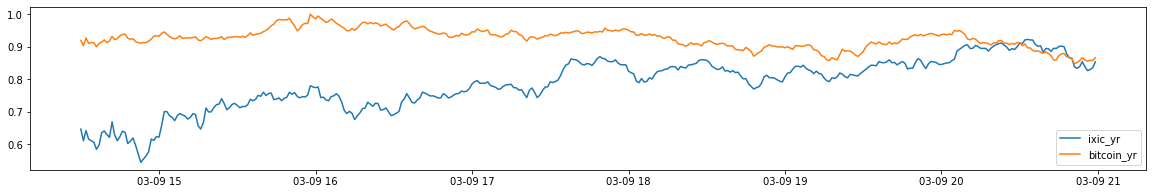

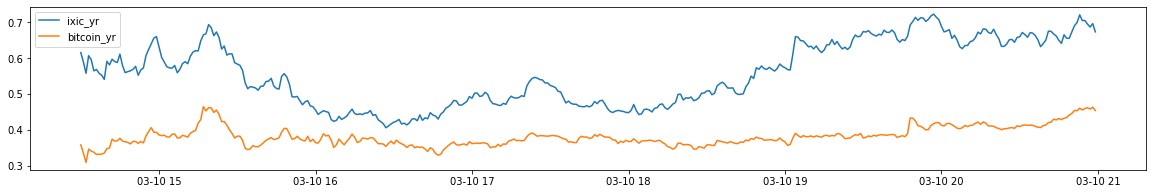

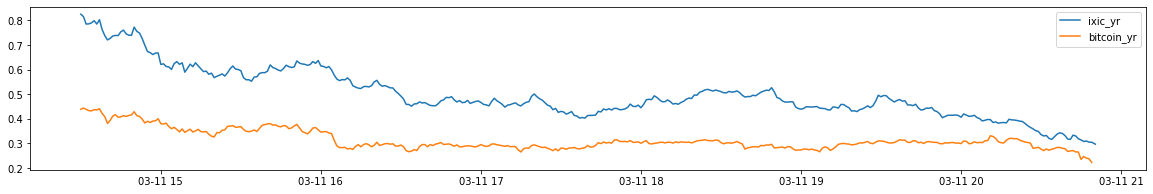

In [27]:
for date in ixic['day'].unique():
    temp_ixic = ixic.loc[ixic['day'] == date]
    temp_btc = bitcoin1.loc[bitcoin1['day'] == date]
    plt.figure(figsize=(20,3))
    plt.plot('Datetime', 'nm_close', data=temp_ixic)
    plt.plot('datetime', 'nm_close', data=temp_btc)
    plt.legend(labels=('ixic_yr', 'bitcoin_yr'))
    plt.show()

### Summary

1. It seems that daily Nasdaq IXIC index price movement and Bitcoin were coupled for some period in the last one year. However, the degree varies month by month. The period after December 2021 seems to show a higher degree of being coupled.

2. The similarity of the two seems to become more evident in the one-minute-interval price change.

## 3. Correlation Coefficient
#### Correlation of daily price change between Nasdaq IXIC index and Bitcoin for the last one year

In [90]:
# merge the pct_change columns of the two into one df for calculating correlation 
df_yr = ixic_yr[['Date', 'month', 'pct_change']].merge(bitcoin_yr1[['datetime','month', 'pct_change']], left_on='Date', right_on='datetime')

corr_yr = df_yr['pct_change_x'].corr(df_yr['pct_change_y'])
print("Correlation :", corr_yr)

Correlation : 0.35056818069479456


#### Correlation of daily price change for the last one year, month by month

In [93]:
for month in df_yr['month_x'].unique():
    temp = df_yr.loc[df_yr['month_x'] == month]
    corr_yr_monthly = temp['pct_change_x'].corr(temp['pct_change_y'])
    print(month, ", Correlation :", corr_yr_monthly)

2021-03 , Correlation : 0.15511993441118005
2021-04 , Correlation : 0.12948984204861394
2021-05 , Correlation : 0.5890778656806338
2021-06 , Correlation : -0.1217642414571979
2021-07 , Correlation : 0.1274521213689517
2021-08 , Correlation : 0.22987839562774295
2021-09 , Correlation : 0.4340411184609358
2021-10 , Correlation : 0.149120381458222
2021-11 , Correlation : 0.3585409684854826
2021-12 , Correlation : 0.514221081314071
2022-01 , Correlation : 0.5949711624292838
2022-02 , Correlation : 0.4570830707306888
2022-03 , Correlation : 0.5915533005603979


#### Correlation of one-minute-interval price change for the last 5 days

In [96]:
# merge the pct_change columns of the two into one df for calculating correlation 
df_min = ixic[['Datetime', 'day', 'hour', 'pct_change']].merge(bitcoin1[['datetime','day', 'hour', 'pct_change']], left_on='Datetime', right_on='datetime')

corr_min = df_min['pct_change_x'].corr(df_min['pct_change_y'])
print("Correlation :", corr_min)

Correlation : 0.4708297723431564


#### Correlation of one-minute-interval price change for the last 5 days, day by day

In [98]:
for day in df_min['day_x'].unique():
    temp = df_min.loc[df_min['day_x'] == day]
    corr_daily = temp['pct_change_x'].corr(temp['pct_change_y'])
    print(day, ", Correlation :", corr_daily)

2022-03-07 , Correlation : 0.41899415096227666
2022-03-08 , Correlation : 0.7282737295945267
2022-03-09 , Correlation : 0.26152472070950306
2022-03-10 , Correlation : 0.44636596604409134
2022-03-11 , Correlation : 0.5265715612900144


#### Correlation of one-minute-interval price change for the last 5 days, hour by hour

In [103]:
# to make a dataframe of each correlation coeficient
corr_dict = {"hour" : [], "corr" : []}
for hour in df_min['hour_x'].unique():
    temp = df_min.loc[df_min['hour_x'] == hour]
    corr_hourly = temp['pct_change_x'].corr(temp['pct_change_y'])
    corr_dict['hour'].append(hour)
    corr_dict['corr'].append(corr_hourly)

corr_df = pd.DataFrame(corr_dict)
corr_df

,hour,corr
0,2022-03-07 14:00,0.636269
1,2022-03-07 15:00,0.543447
2,2022-03-07 16:00,0.352524
3,2022-03-07 17:00,0.564161
4,2022-03-07 18:00,0.247963
5,2022-03-07 19:00,0.361904
6,2022-03-07 20:00,0.537432
7,2022-03-08 14:00,0.761265
8,2022-03-08 15:00,0.653306
9,2022-03-08 16:00,0.616774


#### Number of highly correlated hours

In [113]:
total_len = len(corr_df)
len_high = len(corr_df.loc[corr_df['corr'] > 0.6])
print("Total:", total_len, "|", "Over 0.6: ", len_high)

Total: 35 | Over 0.6:  17


#### Bar chart of hour and correlation coefficient, one-minute-interval price change 

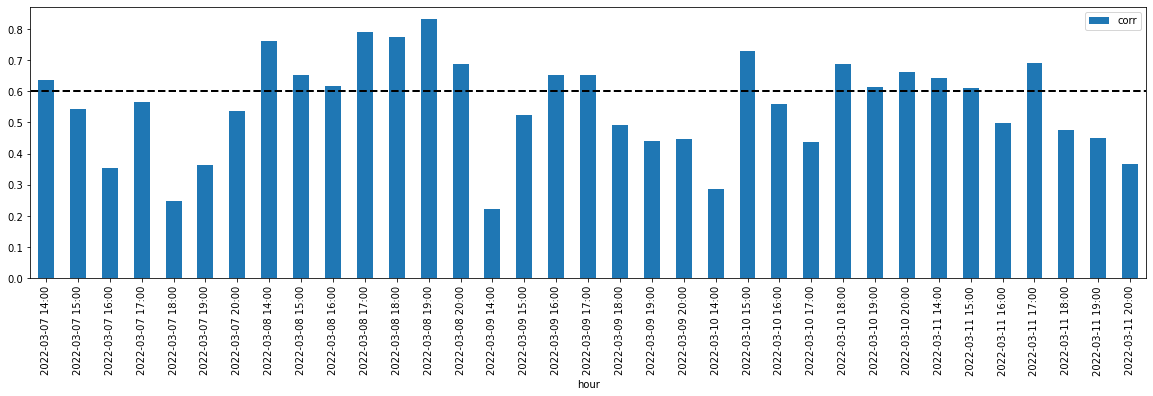

In [125]:
ax = corr_df.plot.bar(x="hour", y="corr", figsize=(20,5))
ax.axhline(y=0.6, xmin=-1, xmax=1, color='black', linestyle='--', lw=2)

### Summary

1. The daily price change of Nasdaq IXIC index and Bitcoin for the last one year do not seem to be correlated significantly, showing a very weak positive correlation coefficient, 0.35

2. However, the degree of daily price correlation between the two varies by month. In some months, the two's price movements are more similar than usual. For example, in 2021-05, 2021-12, 2022-01 and 2022-03, they show a moderate positive correlation, around 0.5 correlation coefficient. 

3. Similarly, while their 1-minute-interval price movements for the past 5 days as a whole do not seem to related strongly, there is a certain day they show a strong correlation including 2022-03-08 with about 0.72 correlation coefficient.

4. When their one-minute-interval price movements were looked into hour by hour, periods with a strong correlation were seen more frequently. 17 out of the total 35 periods show a strong positive correlation coefficient, more than 0.6. Also, from 2022-03-08 19:00 UTC to 20:00 UTC on the same day, the correlation of the two are very strong, with correlation coeffient being 0.83.

5. In sum, their movements tend to correlated for a short term, an hour in the above analysis, rather than for a long or constant term as day or month.  

# Conclusion

This analysis was to answer the questions as follows:

1. Are Nasdaq IXIC index price change and Bitcoin price change coupled as I felt during my actual trading?

2. If so, the correlation between the two is constant or just in certain period for a short term?

3. if there is a correlation, should a further research focus on a scalping trading scale (focusing on one-minute-interval change in a limited term) or a day trading scale (focusing on daily change in a relatively long term)? 

According to the results above,

1. Nasdaq IXIC index price change and Bitcoin price change seem to be coupled, but only in a certain moment.

2. Similarity in price movements do not seem to take place for a long term or contantly. It does often for a short term like for an hour on a minute-to-minute basis.  

3. Further research on their relationship should be in a scalping trading level, which means that I should collect and study minute-by-minute price change data or even more micro one than a minute basis if possible.